# Car Insurance Claim Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
sb.set()

In [2]:
o_data = pd.read_csv('train.csv')
o_data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
print("Data Dims: ", o_data.shape)

Data Dims:  (58592, 44)


In [4]:
print(o_data.dtypes)

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

In [5]:
#Check for presence of null values in the dataset
print("Number of null values in each column: ")
print(o_data.isnull().sum())

Number of null values in each column: 
policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_rad

Since there are no null values within the dataset, there are no columns that need to be removed due to invalid data.

In [6]:
#Check for duplicate rows 
print("Number of rows that are duplicates: ")
print(o_data.duplicated().sum())

Number of rows that are duplicates: 
0


Since the number of duplicates = 0, we can conclude that each set of data within the dataset is unique.

In [7]:
#Finding the ratio of claims vs no claims
class_freq = o_data['is_claim'].value_counts()
print(class_freq)

is_claim
0    54844
1     3748
Name: count, dtype: int64


In [8]:
class_ratio = class_freq[0]/class_freq[1]
print("Ratio of Class 0 to Class 1: {:.2f}".format(class_ratio))

Ratio of Class 0 to Class 1: 14.63


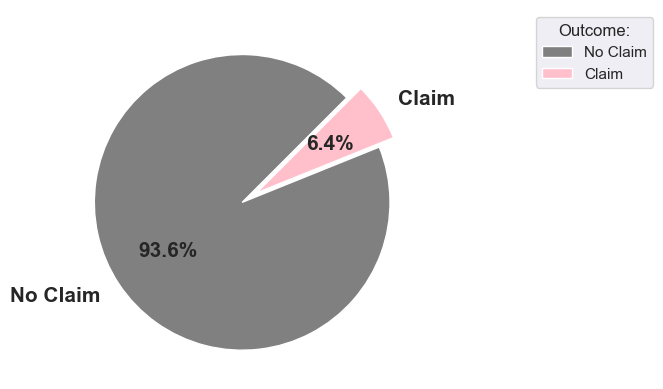

In [9]:
fig = plt.figure(facecolor ='white')
ax = fig.add_subplot(1,1,1, facecolor = 'white')
plt.pie((class_freq), labels=['No Claim', 'Claim'], radius = 1, colors = ['gray', 'pink'], autopct = '%1.1f%%', explode = [0.1, 0.015], labeldistance = 1.15, startangle = 45, textprops={'fontsize':15, 'fontweight': 'bold'})
plt.legend(title='Outcome:', loc='upper right', bbox_to_anchor=(1.6,1))
fig.patch.set_facecolor('white')
plt.show()

Due to the large class imbalance in the response variable 'is_claim', we need to fix this to prevent further problems for classification models. 

In [10]:
no_claim = o_data.drop(o_data[o_data['is_claim']==1].index)
claim = o_data.drop(o_data[o_data['is_claim']==0].index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   area_cluster_C1              58592 non-null  float64
 1   area_cluster_C10             58592 non-null  float64
 2   area_cluster_C11             58592 non-null  float64
 3   area_cluster_C12             58592 non-null  float64
 4   area_cluster_C13             58592 non-null  float64
 5   area_cluster_C14             58592 non-null  float64
 6   area_cluster_C15             58592 non-null  float64
 7   area_cluster_C16             58592 non-null  float64
 8   area_cluster_C17             58592 non-null  float64
 9   area_cluster_C18             58592 non-null  float64
 10  area_cluster_C19             58592 non-null  float64
 11  area_cluster_C2              58592 non-null  float64
 12  area_cluster_C20             58592 non-null  float64
 13  area_cluster_C21

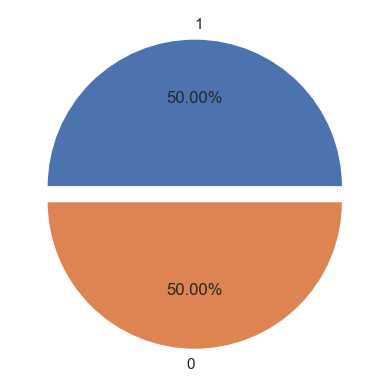

Train Data
Accuracy  :	 0.6298835484890477


NameError: name 'confusion_matrix' is not defined

In [19]:

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

#Create numeric and categorical transformers to handle different variables 

cat_features = o_data[['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power']]

num_data = o_data[['age_of_car', 'age_of_policyholder', 'policy_tenure', 'is_claim']]

# OneHotEncoding of categorical predictors (not the response)
ohe.fit(cat_features)
cat_features_ohe = pd.DataFrame(ohe.transform(cat_features).toarray(),
                                columns=ohe.get_feature_names_out(cat_features.columns))

# Check the encoded variables
cat_features_ohe.info()
total_features_ohe = pd.concat([num_data, cat_features_ohe],
                               sort = False, axis = 1).reindex(index=num_data.index)

from sklearn.utils import resample

claim = total_features_ohe[total_features_ohe['is_claim'] == 1]
nclaim = total_features_ohe[total_features_ohe['is_claim'] == 0]

claim_upsampled = resample(claim,
                           replace=True,
                           n_samples=len(nclaim),
                           random_state=1)

final_train = pd.concat([claim_upsampled, nclaim])
#Plot upsampled data 
plt.pie(final_train['is_claim'].value_counts(), labels=final_train['is_claim'].value_counts().index.tolist(),
        autopct='%1.2f%%', explode=[0.05] * 2)
plt.show()
# Import RandomForestClassifier model from Scikit-Learn


Train Data
Accuracy  :	 0.6251063622881871

TPR Train :	 0.7191355026711996
TNR Train :	 0.5308620941439907

FPR Train :	 0.46913790585600934
FNR Train :	 0.28086449732880037


<Axes: >

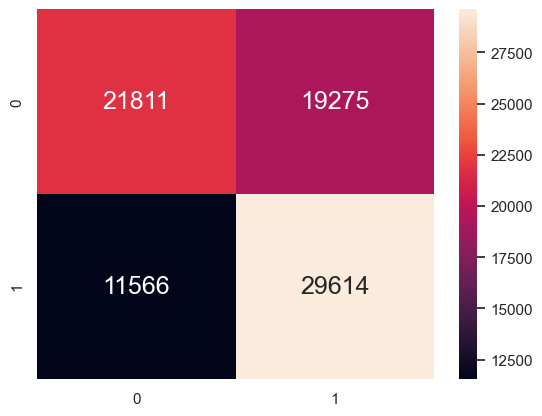

In [22]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(n_estimators=400, max_depth=5)

from sklearn.model_selection import train_test_split

y = final_train['is_claim']
x = final_train.drop('is_claim', axis=1)
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

rforest.fit(x_train, y_train)
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(x_train, y_train))
print()

from sklearn.metrics import confusion_matrix
# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]  # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1]  # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0]  # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0]  # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain / (tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain / (tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain / (tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain / (tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18})


# Analysis of Numeric Variables

In this segment, we will be investigating whether there are any relationships between the numeric variables and "is_claim".

In [13]:
numeric_data = o_data.select_dtypes(include = ['number'])

In [14]:
numeric_data.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,3995,1735,1515,1335,2,0
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0


In [15]:
numeric_data = numeric_data.drop(['ncap_rating','make', 'policy_tenure', 'gear_box'], axis =1)
numeric_data.describe().round(2)
print(numeric_data.dtypes)

age_of_car             float64
age_of_policyholder    float64
population_density       int64
airbags                  int64
displacement             int64
cylinder                 int64
turning_radius         float64
length                   int64
width                    int64
height                   int64
gross_weight             int64
is_claim                 int64
dtype: object


In [ ]:
numeric_data.hist(figsize = (12,10))
plt.tight_layout()
plt.show()

The histograms generated are useful in helping us make a few observations: 

1) Majority of car owners buy insurance upon purchasing their cars 
2) Most policy holders are around 40-50 years of age. 

In [ ]:
ndata_no_claim = numeric_data.drop(numeric_data[numeric_data['is_claim']==1].index)
ndata_no_claim.describe().round(2)

In [ ]:
ndata_claim = numeric_data.drop(numeric_data[numeric_data['is_claim']==0].index)
ndata_claim.describe().round(2)

There does not seem to be a relationship between the numeric variables and the likelihood of claiming car insurance. The average of the numeric variables across the 2 datasets (ndata_claim and ndata_no_claim) seem to be similar.

# Analysis of Categorical Variables

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(30, 24))
axes = axes.flatten()

cat_var=['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque','max_power', 'engine_type', 'is_speed_alert','is_claim']

for i in range(len(cat_var)):
    column = cat_var[i]
    ax = axes[i]  # Select the current subplot

    # Plot the countplot
    sns.countplot(data=data, x=column, ax=ax, hue='is_claim')
    ax.set_title(f'Countplot for {column}')
    
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels if need
    
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

We can make a few observations from the categorical variables:

1) From the top left plot, we can infer that the greatest number of claims (about 1000) comes from area c8. 
2) From the top right plot, we can infer that owners of car models M1, M4 and M6 have the highest number of claims (about 1000 each). 
3) There are zero claims where the car does not possess a speed alert system.

In [ ]:
cat_data = data[['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque','max_power', 'engine_type', 'is_speed_alert','is_claim']]

In [ ]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'area_cluster']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [ ]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'segment']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [ ]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'model']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [ ]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'fuel_type']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [ ]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'max_torque']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [ ]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'max_power']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [ ]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'engine_type']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [ ]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'is_speed_alert']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [ ]:

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#Create numeric and categorical transformers to handle different variables 

cat_features = o_data['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque','max_power']

num_data = o_data['age_of_car', 'age_of_policyholder', 'policy_tenure','is_claim' ]

# OneHotEncoding of categorical predictors (not the response)
ohe.fit(cat_features)
cat_features_ohe = pd.DataFrame(ohe.transform(cat_features).toarray(),
                                  columns=ohe.get_feature_names_out(cat_features.columns))

# Check the encoded variables
cat_features_ohe.info()
total_features_ohe = num_data.concat(cat_features_ohe)

In [ ]:
from sklearn.utils import resample


claim = total_features_ohe[total_features_ohe['is_claim']==1]
nclaim = total_features_ohe[total_features_ohe['is_claim'] == 0]

claim_upsampled = resample(claim,
                           replace = True,
                           n_samples = len(nclaim),
                           random_state = 1)

final_train = pd.concat([claim_upsampled, nclaim])

In [ ]:
#Plot upsampled data 
plt.pie(final_train['is_claim'].value_counts(),labels = final_train['is_claim'].value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*2)
plt.show()

In [ ]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators = 400, max_depth=5)

from sklearn.model_selection import train_test_split

y = final_train['is_claim']
x = final_train.drop('is_claim', axis = 1 )
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)


In [ ]:
rforest.fit(x_train, y_train)
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})